# simple linear regression ML example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# not required for ml, just to compare with linear regresson
import pandas as pd
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
# generate random training data (fake data with linear relationship, not part of ml)
observations = 1000
# f(x,z) = a*x + b*z + c => example: 2*x - 3*z + 5 + noise
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# imputs matrix n*k (n=observations, k=variables => 1000*2) 
inputs = np.column_stack((xs,zs))

print(inputs.shape) # 1000,2

(1000, 2)


In [3]:
# create targets, example: 2*x - 3*z + 5 + noise
noise = np.random.uniform(low=-1, high=1, size=(observations,1))
targets = 2*xs - 3*zs + 5 + noise

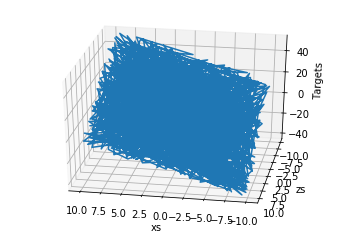

In [5]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
targets = targets.reshape(observations,)

fig = plt.figure()
# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

ax.view_init(azim=100)
plt.show()

# reshape the targets back to the shape that they were in before plotting.
targets = targets.reshape(observations,1)

In [6]:
# initial range for weights and biases
init_range = 0.1
# 2 inputs, 1 output
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))
# 1 output
biases = np.random.uniform(low=-init_range, high=init_range, size=1)
print (weights)
print (biases)

[[0.07070089]
 [0.00546098]]
[0.00633084]


In [7]:
# set some learning rate
learning_rate = 0.05

In [7]:
# train the model
# outputs = xw + b => use dot method to multiply x and w matrixes
for i in range (100):
    outputs= np.dot(inputs, weights) + biases # python adds items from biases matrix element-wise
    deltas = outputs - targets
    # calculate loss (half L2 norm loss) => (sum(y-t)^2)/2
    loss = np.sum(deltas **2)/2/observations #average loss per observation
    print (loss) # shall decresease with each iteration
    # update weights and biases according to gradient descent
    deltas_scaled = deltas / observations # scale same way as loss function
    # weights (Wi+1 = Wi - LR*sum(Xi*DELTAi)) => LR - eta or learning rate +> sum done with dot operation over matrixes
    weights = weights - learning_rate*np.dot(inputs.T,deltas_scaled) # inputs.T => transpose from 1000x1 to 1x1000
    # biases (Bi+1 = Bi - LR(sum(DELTAi)))
    biases = biases - learning_rate*sum(deltas_scaled)


448.0147455519984
180.17176263132396
79.36634982359404
40.688016564522535
25.216389251330757
18.486782842968758
15.109775462448154
13.068874881180347
11.603556153404691
10.422190476503435
9.408925778504956
8.514303176699805
7.714329180682766
6.995099636201468
6.346981635572131
5.762380564164186
5.2348573120254285
4.758757430364341
4.3290369657874885
3.941165923085439
3.5910641097180016
3.2750519556036632
2.9898094456711206
2.732340320593263
2.499940249451971
2.290168288128304
2.100821188671311
1.929910237896767
1.7756403619203038
1.6363912694086862
1.5107004324886735
1.3972477253913649
1.2948415590350044
1.2024063657392876
1.1189713025533563
1.0436600545212982
0.9756816307783774
0.9143220568054414
0.8589368755838973
0.8089443788905192
0.763819497640379
0.7230882871083456
0.6863229491075941
0.6531373388432853
0.6231829092500605
0.5961450502169076
0.5717397842504359
0.5497107838712297
0.5298266794171451
0.511878628977499
0.49567812493529245
0.4810550140796514
0.4678557104938336
0.4559415

In [8]:
print (weights, biases)

[[ 1.99393575]
 [-2.99935144]] [5.0136935]


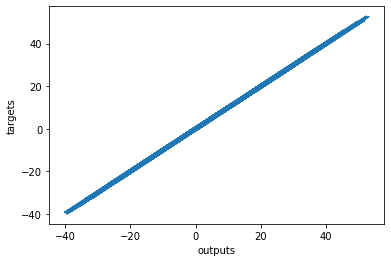

In [9]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

In [8]:
# check multiple linear regression to compare it with ML
df = pd.DataFrame(columns={'X', 'Z', 'Target'})
df['X'] = xs.reshape(observations,)
df['Z'] = zs.reshape(observations,)
df['Target'] = targets.reshape(observations,)
df = df[['X', 'Z', 'Target']]
# df.columns = ['X', 'Z', 'Target']
#df = pd.DataFrame({'X': xs_array})
# df['Y'] = zs
# df['Target'] = targets
df.head()
x = df[['X', 'Z']]
y = df['Target']
reg = LinearRegression()
reg.fit(x,y)
print(reg.coef_, reg.intercept_)

[ 1.99961851 -2.99800598] 4.995488146974997


In [18]:
# example with tesorflow
observations = 1000
# f(x,z) = a*x + b*z + c => example: 2*x - 3*z + 5 + noise
ps = np.random.uniform(low=-10, high=10, size=(observations,1))
qs = np.random.uniform(-10, 10, (observations,1))
inputs = np.column_stack((ps,qs))
noise = np.random.uniform(low=-1, high=1, size=(observations,1))
targets = ps*2 - 3*qs + 5 + noise
np.savez('intro_TF', inputs=inputs, targets=targets)

In [50]:
data = np.load('intro_TF.npz')
input_size=2
output_size=1
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size) # 1 layaer === input size
])
model.compile(optimizer='sgd', loss='huber_loss')
model.fit(data['inputs'], data['targets'], epochs=100, verbose=0)

In [51]:
# get weights
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]
print (weights, bias)

[[ 1.9918362]
 [-2.9756513]] [4.970324]


In [52]:
result = model.predict_on_batch(data['inputs'])
predictions = result.numpy().round(1)
compare = np.column_stack((targets,predictions))
compare

array([[ 14.34304115,  13.5       ],
       [-15.83674046, -15.69999981],
       [  3.83006296,   4.80000019],
       ...,
       [ 20.01559845,  20.39999962],
       [ 34.92731428,  35.40000153],
       [-23.3662426 , -23.5       ]])

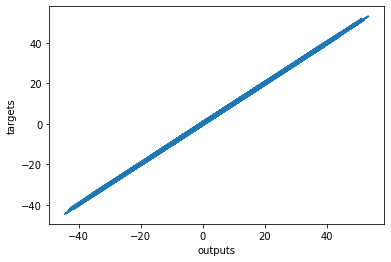

In [48]:
plt.plot(predictions,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()